# Classifying Dog and Cat using CNN on Tensorflow 2.x

##Problem Statement

**Dataset:** The Dogs vs. Cats dataset is a standard computer vision dataset that involves classifying photos as either containing a dog or cat
<br>
It was only effectively addressed in the last few years using deep learning convolutional neural networks. While the dataset is effectively solved, it can be used as the basis for learning and practicing how to develop, evaluate, and use convolutional deep learning neural networks for image classification

####**Tasks to be Performed**

In this tutorial you will be performing the following tasks:
- Prepare the dataset for the model
- Install Tensorflow 2.x
- Develop convolutional neural network model for classifying the images or Dog Vs cat
- Plot the change in accuracy per epochs
- Evaluate the model on the testing data
- Analyse the model summary
- Add Dropout to prevent overfitting and check its effect on accuracy
- Increasing the number of Hidden Layers check its effect on accuracy
- Manipulate the batch_size and epochs and check its effect on accuracy


####**Dataset Description**



The **Dog Vs Cat** image classification dataset consists of 8005 images belonging to 2 classes for training images and 2023 images belonging to 2 classes for testing images


1.   Class I = Dog
2.   Class II= Cat

![alt text](https://imgur.com/d8Qd1hD.gif)


####**Skills Gained**

 TensorFlow 2.x
- Convolutional neural network implementation
- Model Improvisation
- Model Save
- Load the pretrained model


In [ ]:
!nvidia-smi

Sun Aug  8 16:59:41 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.42.01    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   37C    P8     9W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

# Solution: Classifying Dog and Cat using CNN on Tensorflow 2.x

##Pre-process  the Dataset


#####<b>Before start coding please enable your GPU





![alt text](https://i.imgur.com/QGIPBWR.png)

#### <b> Load the  Dataset

In [ ]:
# this is a free set of Dropbox API where the data is available to all of us for lifetime.
!wget https://www.dropbox.com/s/t4pzwpvrzneb190/training_set.zip # contains the labelled training data.
!wget https://www.dropbox.com/s/i37jfni3d29raoc/test_set.zip # contains the test data (labelled).

--2024-05-01 06:05:49--  https://www.dropbox.com/s/t4pzwpvrzneb190/training_set.zip
Resolving www.dropbox.com (www.dropbox.com)... 162.125.1.18, 2620:100:6019:18::a27d:412
Connecting to www.dropbox.com (www.dropbox.com)|162.125.1.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/t4pzwpvrzneb190/training_set.zip [following]
--2024-05-01 06:05:50--  https://www.dropbox.com/s/raw/t4pzwpvrzneb190/training_set.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc9c4fc1c4881b90ebb0c41f112b.dl.dropboxusercontent.com/cd/0/inline/CSD4WoCxuBHq4mVk4wpMXbe7AhFaIh_T4l5jwJ5-r2aEAa8XyBWMyiEpG4ANZ2QJfGHeWSlLHrHG-Xi8suCxinRSQUosNMmI89AuWc7FrWIHOFllP2wuGOGT6K3nBKQYwZ-LHESAaznqYSlOan67EI4b/file# [following]
--2024-05-01 06:05:50--  https://uc9c4fc1c4881b90ebb0c41f112b.dl.dropboxusercontent.com/cd/0/inline/CSD4WoCxuBHq4mVk4wpMXbe7AhFaIh_T4l5jwJ5-r2aEAa8XyBWMyiEpG4ANZ2QJfGHeWSlLHrHG-Xi8suCxinRSQU

#### <b> Unzip the  Data

In [ ]:
!unzip training_set.zip
!unzip test_set.zip

#### <b> Visualize the  Data

In [ ]:
# Using matplotlib we will take some random images
# and visualise them so that we understand the input data we have
# and the level/type of pre-processing we need to do.
# we will also introduce the concepts related to Data Augmentation as we go along.
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img=mpimg.imread('/content/test_set/test_set/cats/cat.4001.jpg')
imgplot = plt.imshow(img)
plt.show()


In [ ]:
# perform similar with an example of a Dog image from the Test set.
img=mpimg.imread('/content/test_set/test_set/dogs/dog.4003.jpg')
imgplot = plt.imshow(img)
plt.show()

The sizes of the randomly chosen images are not matching. This means we have to perform preprocessing of the images in such a way that before we train our model, all the images should be of the same dimensions! Otherwise, our CNN architecture cannot be designed.

##  Import Libraries

In [ ]:
# importing all the required libraries.
import tensorflow

# importing Image data generator library to understand the labels in the images
# as well as to extract the matrix data for each image for training and testing purposes.
# ImageDataGenerator will also be used to perform Data Augmentation.
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# usual libraries for ANN
from tensorflow.keras.models import Sequential

# below, we have also importing the Convolution layer API and the Max Pooling API.
# RELU or any choice of activation layer is part of the CONV2D API itself.
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, Activation

# below library is for preprocessing of the image.
from tensorflow.keras.preprocessing import image

# Perform visualizations.
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

#####Check the TensorFlow version

In [ ]:
print(tensorflow.__version__)

2.15.0


## Designing the Model

#### <b> Initialize the parameters

**Data Preparation.**

1. We are fixing the image size to 150X150.
2. The # of training samples is set to 100 per batch.
3. Same applies to our Validation data.
4. We are choosing the value of Epoch as 20.
5. batch size (size or number of batches to be used during training) = 20.

In [ ]:
# PREPARE THE DATA
img_width, img_height = 150,150  #width and height of the images
train_data_dir = r"/content/training_set/training_set"
validation_data_dir=r"/content/test_set/test_set"
nb_train_sample =100
nb_validation_samples =100
epochs =20
batch_size= 20

#### <b> Check the shape of the image

There are 2 ways to represent the image data as a three dimensional array

1. <b>  Channels Last:<b> Image data is represented in a three-dimensional array where the last channel represents the color channels, e.g. [rows][cols][channels].

2.  <b> Channels First:<b> Image data is represented in a three-dimensional array where the first channel represents the color channels, e.g. [channels][rows][cols].


In [ ]:
# let's first define the dimensions of the images.
# in some images, we have channel,width,height --> known as channel_first representation.
# in some images we have width,height,channel --> otherwise
# that depends on the system from where the image was captured.
import tensorflow.keras.backend as k
if k.image_data_format()=='channels_first':
    input_shape=(3, img_width, img_height) # fixing the input shape basis the input images.
else:
    input_shape=(img_width,img_height,3)
print(input_shape)

(150, 150, 3)


#### <b> Generate Images to train the model



1.   Rescale
2.   Shear_range
3.   Zoom_range
4.  Horizontal_flip

![alt text](https://i.imgur.com/Az24gjL.png)


- This class allows to configure random transformations and normalization on the allocated image during training time
- Prevents overfitting and helps to generate a generalize model
- Never repeats the exact same images twice  to train our model




In [ ]:
# Create an object of the ImageDataGenerator
# perform the data augmentation to the training data.
# why? because we need more data during training, even if testing data volume is comparatively lesser.

# for training data.
train_datagen=ImageDataGenerator (rescale=1. /255, # scaling the pixels in the range of 0-255
                                  shear_range =0.2,
                                  zoom_range=0.2,
                                  horizontal_flip =True)

# for testing data
test_datagen=ImageDataGenerator (rescale=1. /255) # only scaling, no augmentation.

# Now this, will generate training generator data
# Target_size = mentioned image_width and image_height
# Batch_size = 20 (already mentioned)
# Class_mode = binary(because here only two classes are there to classify)
train_generator =train_datagen.flow_from_directory(train_data_dir,
                                                   target_size =(img_width,img_height),
                                                   batch_size=batch_size,
                                                   class_mode='binary',
                                                   classes=['cats','dogs'] # taking names from the dir name
                                                   # cats = 0, dogs = 1 --> label identified by the network.
                                                   )

# Now, this will generate testing generator data
# Target_size = mentioned image_width and image_height
# Batch_size = 20 (already mentioned)
# Class_mode = binary(because here only two classes are there to classify)
validation_generator =test_datagen.flow_from_directory(validation_data_dir,
                                                       target_size =(img_width,img_height),
                                                       batch_size=batch_size,
                                                       class_mode='binary')



Found 8005 images belonging to 2 classes.
Found 2023 images belonging to 2 classes.


####**Visual Representation of ImageDataGenerator**

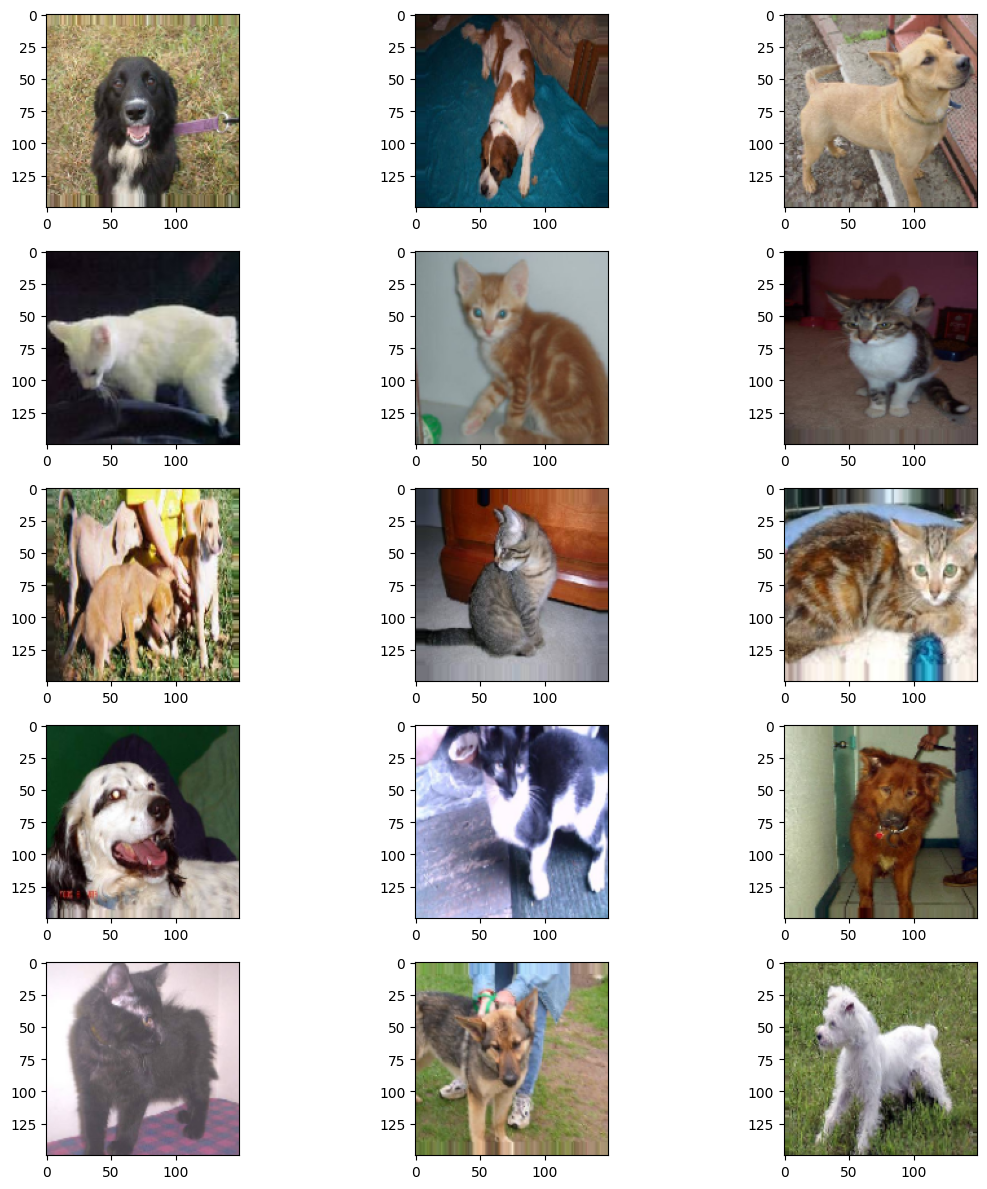

In [ ]:
# print some random images from the set of training and validation datasets.
plt.figure(figsize=(12, 12))
for i in range(0, 15):
    plt.subplot(5, 3, i+1)
    for X_batch, Y_batch in train_generator:
        image = X_batch[0]
        plt.imshow(image)
        break
plt.tight_layout()
plt.show()

### <b> Build the basic CNN model 0

####<b> Layers in CNN:


<b>

1.   Conlutional Layer
2.   ReLu
3. Pooling Layer
4. Fully Connected Layer (Dense)


![alt text](https://i.imgur.com/P4yvxRW.png)

![alt text](https://i.imgur.com/a2vSxQW.png)


- Adding convolutional neural network in the model
- add() - Helps to add layers in the model
- Conv2D() - Convolutional layer (to extract features from the images)
- Conv2D(32,(3,3),input_shape=input_shape)
  - 32 - Take 32 features from the given image
  - (3,3) - Metrics size of the images(3*3)
  - input_shape = image size

- Activation function (relu) is added to remove the negative values


In [ ]:
# create a sequential model
# because: we need a sequence of layers to define our CNN components and further, the ANN components.
# in some literature, or books, we would find the ANN components written as FCN or fully connected layers.
# output of CNN should be a flatten layer, irrespective of the internal stages of CNN operations.
model = Sequential()

# Add a convolution layer
# This function CONV2D allows to create convolutional neural network to extract feature from the images
model.add(Conv2D(64, # number of neurons - i.e., the number of filters or kernels
                 (3,3), # filter size, it can be any size and any type
                 input_shape=input_shape)) # 64 neurons with 3*3 filter

# add a RELU layer
model.add(Activation('relu'))

# add a max pooling layer using the MaxPooling2D API
# MaxPooling2D helps to reduce the size of the data
model.add(MaxPooling2D(pool_size=(2,2))) # dimension of the output from each pool from each filter.

## Here we start with our ANN

# Converts multi dimensional array to 1D channel
# 1D channel = feature vector representation, required for ANN.
# we can call this our Input layer.
model.add(Flatten())

# first hidden layer
model.add(Dense(64)) # 64 neurons

# Adding the activation layer in our ANN as RELU
model.add(Activation('relu'))

# Output layer
model.add(Dense(1)) # we can have 1 neuron and use Sigmoid function since we have a Binary classification problem

# Add the activation function to our Output layer.
model.add(Activation('sigmoid')) # sigmoid activation function

# finally we print the summary of the model.
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 64)      1792      
                                                                 
 activation (Activation)     (None, 148, 148, 64)      0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 64)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 350464)            0         
                                                                 
 dense (Dense)               (None, 64)                22429760  
                                                                 
 activation_1 (Activation)   (None, 64)                0         
                                                        

**Quick summary of findings.**

1. 1792 parameters in the Conv layer is: trainable weights.
2. in the RELU layer and MaxPooling layer we are simply performing calculations, hence nothing is there to learn in Back Prop!
3. again we have weights in the dense layer from the 1D vector representation of our input towards ANN. In our case we have 22429760 random trainable weights assigned to our input towards the ANN model.
4. finally inside the ANN model's hidden layer, we have 65 weights to be trained.

Hence in total we get 22431617 weights in our model, which will get estimated and re-evaluated over 20 Epochs which we have designed, during the back propagation stage.


#### <b> Compile the basic CNN model

In [ ]:
# compilation of our new model (CNN + ANN) is exactly the same as we did in case of ANN
# since we have to define global set of hyperparameters for the entire model.
model.compile(optimizer='rmsprop', # we could use Adam here as well, which is very efficient.
              loss='binary_crossentropy', # binary classification problem
              metrics=['accuracy'])
#model.summary()

#### <b> Fit the basic CNN model

In [ ]:
# now we can train our model.
training = model.fit(train_generator, # training data which is generated after augmentation
                     steps_per_epoch=nb_train_sample, # 100
                     epochs=epochs, # 20
                     validation_data=validation_generator, # validation data from validation generator
                     validation_steps=nb_validation_samples # 100
                     )

Epoch 1/20
100/100 [==============================] - 22s 180ms/step - loss: 2.3021 - accuracy: 0.5496 - val_loss: 0.6549 - val_accuracy: 0.5810
Epoch 2/20
100/100 [==============================] - 19s 187ms/step - loss: 0.6602 - accuracy: 0.6200 - val_loss: 0.6176 - val_accuracy: 0.6665
Epoch 3/20
100/100 [==============================] - 16s 158ms/step - loss: 0.6367 - accuracy: 0.6415 - val_loss: 0.5874 - val_accuracy: 0.6910
Epoch 4/20
100/100 [==============================] - 18s 179ms/step - loss: 0.6117 - accuracy: 0.6610 - val_loss: 0.5952 - val_accuracy: 0.6975
Epoch 5/20
100/100 [==============================] - 16s 159ms/step - loss: 0.6021 - accuracy: 0.6745 - val_loss: 0.5952 - val_accuracy: 0.6940
Epoch 6/20
100/100 [==============================] - 18s 180ms/step - loss: 0.6131 - accuracy: 0.6645 - val_loss: 0.5752 - val_accuracy: 0.6905
Epoch 7/20
100/100 [==============================] - 16s 163ms/step - loss: 0.6170 - accuracy: 0.6665 - val_loss: 0.5619 - val_ac

#### <b> Find the accuracy score


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


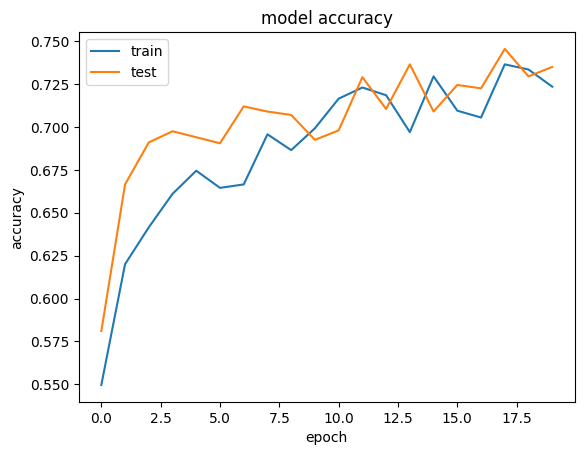

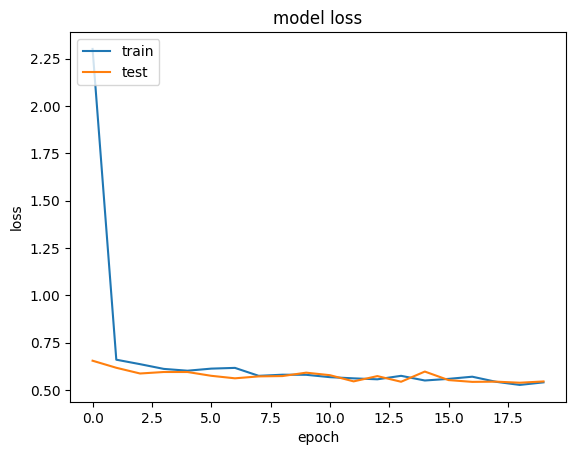

In [ ]:
# let's visualize the accuracy.
# This is the same function we used in our last use case of ANN (MNIST dataset.)

# importing library.
import matplotlib.pyplot as plt
%matplotlib inline

# list all data in training
print(training.history.keys())

# summarize training for accuracy
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize traning for loss
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**Initial findings.**

1. our initial model is not very bad, but not so good w.r.t CNN/DL.
2. we can try and add more layers/stages in the network.
3. let's also try to implement best practices to control overfitting.

#### <b> Predict the image


1/1 [==============================] - 0s 229ms/step
[[0.]]
Prediction:  Cat


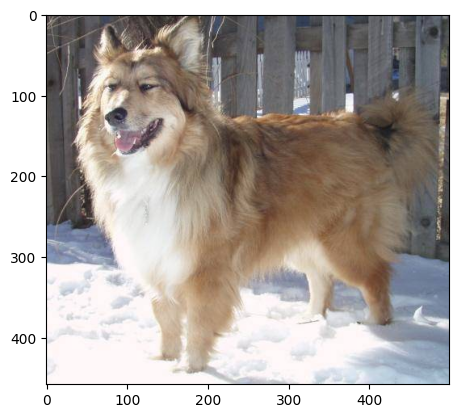

In [ ]:
# import the libraries.
from tensorflow.keras.preprocessing import image
import numpy as np

# load a sample image
img_pred = image.load_img("/content/test_set/test_set/dogs/dog.4006.jpg",target_size=(150,150))

# represent the sample test image in form of a matrix.
img_pred=image.img_to_array(img_pred)
img_pred=np.expand_dims(img_pred, axis=0)

# capturing the results from our model.
rslt = model.predict(img_pred) # similar .predict() function is used here, just like we used in ANN or ML.

# print the results.
# the results from the network will be a number : 0 or 1.
# we have to manually convert it back into a readable format.
print(rslt)
if rslt[0][0]==1:
    prediction ="Dog"
else:
    prediction ="Cat"
print('Prediction: ',prediction)

# also along with the predictions display the same image.
img=mpimg.imread('/content/test_set/test_set/dogs/dog.4006.jpg')
imgplot = plt.imshow(img)
plt.show()


####<b> Predict the image


1/1 [==============================] - 0s 18ms/step
[[1.]]
Prediction:  Dog


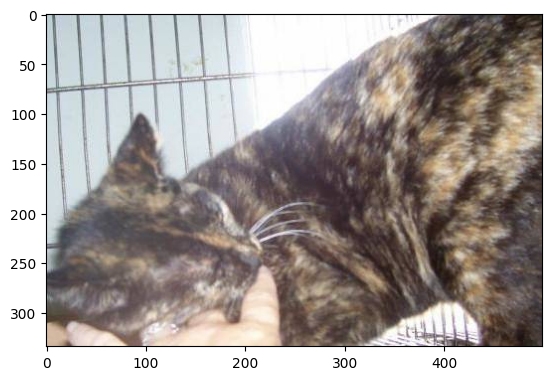

In [ ]:
## JUST REPEATING PREVIOUS STEP ONCE MORE WITH AN EXAMPLE OF A CAT.

img_pred = image.load_img("/content/test_set/test_set/cats/cat.4006.jpg",target_size=(150,150))

img_pred=image.img_to_array(img_pred)
img_pred=np.expand_dims(img_pred, axis=0)

rslt = model.predict(img_pred)
print(rslt)
if rslt[0][0]==1:
    prediction ="Dog"
else:
    prediction ="Cat"
print('Prediction: ',prediction)

img=mpimg.imread('/content/test_set/test_set/cats/cat.4006.jpg')
imgplot = plt.imshow(img)
plt.show()


### <b> Build the basic CNN model 1

####<b> Let's add add some layers to prevent ovetfitting


**Dropout:** used to deactive some neurons randomly to prevent overfitting
<br>
**Early Stop:**
To prevent over fitting we will stop the learning after 10 epochs and val_loss value not decreased
<br>
**Learning Rate Reduction:**
We will reduce the learning rate when then accuracy not increase for 2 steps
- monitor: quantity to be monitored.
- factor: factor by which the learning rate will be reduced. new_lr = lr * factor
- patience: number of epochs with no improvement after which learning rate will be reduced.
- verbose: int. 0: quiet, 1: update messages.
- mode: one of {auto, min, max}. In min mode, lr will be reduced when the quantity monitored has stopped decreasing; in max mode it will be reduced when the quantity monitored has stopped increasing; in auto mode, the direction is automatically inferred from the name of the monitored quantity.
- min_delta: threshold for measuring the new optimum, to only focus on significant changes.
- cooldown: number of epochs to wait before resuming normal operation after lr has been reduced.
- min_lr: lower bound on the learning rate.



In [ ]:
# import libraries. (optional)
from keras.models import Sequential

# importing additionally the dropout and the batchnorm layer.
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization

# more optimization of the model.
# early stopping : stop the iterations when the we have not so visible change in accuracy or loss values.
# Learning Rate Reduction: as we approach Global minima, let's reduce the learning rate to slow our speed of declining the loss function val.
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

# one example of early stopping.
earlystop = EarlyStopping(monitor='val_accuracy', # accuracy is the parameter of interest.
                          patience = 10, # how much time we will wait
                          min_delta = 0.01, # min change expected in the acc value.
                          mode='max') # overall expectations --> accuracy of the model should be Max()

# we are creating the network exactly as the previous design.
# we will just add the Dropout layer as a start.
model1 = Sequential()
model1.add(Conv2D(64,(3,3),input_shape=input_shape)) # 64 neurons with 3*3 filter
model1.add(Activation('relu'))
model1.add(MaxPooling2D(pool_size=(2,2)))
model1.add(Flatten()) ### THIS FLATTEN LAYER IS THE OUTPUT OF CNN GOING INTO ANN --> this is the connection between CNN & ANN.
model1.add(Dense(64)) # 64 neurons
model1.add(Activation('relu'))
model1.add(Dropout(0.5))# Prevents overfitting of the model and it has the effect of reducing the capacity or thinning the network during training
model1.add(Dense(1)) # output layer
model1.add(Activation('sigmoid')) # sigmoid activation function
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 148, 148, 64)      1792      
                                                                 
 activation_3 (Activation)   (None, 148, 148, 64)      0         
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 74, 74, 64)        0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 350464)            0         
                                                                 
 dense_2 (Dense)             (None, 64)                22429760  
                                                                 
 activation_4 (Activation)   (None, 64)                0         
                                                      

#### <b> Compile the basic CNN model1

In [ ]:
model1.compile(optimizer='adam', # instead of RMSProp let's use Adam.
              loss='binary_crossentropy',
              metrics=['accuracy'])
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 148, 148, 64)      1792      
                                                                 
 activation_3 (Activation)   (None, 148, 148, 64)      0         
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 74, 74, 64)        0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 350464)            0         
                                                                 
 dense_2 (Dense)             (None, 64)                22429760  
                                                                 
 activation_4 (Activation)   (None, 64)                0         
                                                      

#### <b> Fit the basic CNN model1

In [ ]:
training = model1.fit(train_generator,
                      steps_per_epoch=nb_train_sample,
                      epochs=10,
                      validation_data=validation_generator,
                      validation_steps=nb_validation_samples,
                      callbacks=[earlystop])

Epoch 1/10
100/100 [==============================] - 21s 179ms/step - loss: 1.2086 - accuracy: 0.5204 - val_loss: 0.6752 - val_accuracy: 0.5435
Epoch 2/10
100/100 [==============================] - 18s 181ms/step - loss: 0.6809 - accuracy: 0.5713 - val_loss: 0.6560 - val_accuracy: 0.6040
Epoch 3/10
100/100 [==============================] - 18s 179ms/step - loss: 0.6697 - accuracy: 0.5970 - val_loss: 0.7039 - val_accuracy: 0.5265
Epoch 4/10
100/100 [==============================] - 18s 179ms/step - loss: 0.6630 - accuracy: 0.6040 - val_loss: 0.6784 - val_accuracy: 0.5905
Epoch 5/10
100/100 [==============================] - 17s 167ms/step - loss: 0.6696 - accuracy: 0.6085 - val_loss: 0.6648 - val_accuracy: 0.5820
Epoch 6/10
100/100 [==============================] - 18s 179ms/step - loss: 0.6475 - accuracy: 0.6460 - val_loss: 0.6424 - val_accuracy: 0.6310
Epoch 7/10
100/100 [==============================] - 16s 161ms/step - loss: 0.6516 - accuracy: 0.6438 - val_loss: 0.6205 - val_ac

#### <b> Find the accuracy score


In [ ]:
## SAME AS PREVIOUS STEP.

import matplotlib.pyplot as plt
%matplotlib inline

# list all data in training
print(training.history.keys())

# summarize training for accuracy
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize traning for loss
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#### <b> Predict the image


In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np
img_pred = image.load_img("/content/test_set/test_set/dogs/dog.4003.jpg",target_size=(150,150))

img_pred=image.img_to_array(img_pred)
img_pred=np.expand_dims(img_pred, axis=0)

result = model1.predict(img_pred)
print(result)
if result[0][0]==1:
    prediction ="Dog"
else:
    prediction ="Cat"
print('Prediction: ',prediction)

img=mpimg.imread('/content/test_set/test_set/dogs/dog.4003.jpg')
imgplot = plt.imshow(img)
plt.show()


In [ ]:
img_pred = image.load_img("/content/test_set/test_set/cats/cat.4003.jpg",target_size=(150,150))

img_pred=image.img_to_array(img_pred)
img_pred=np.expand_dims(img_pred, axis=0)

rslt = model1.predict(img_pred)
print(rslt)
if rslt[0][0]==1:
    prediction ="Dog"
else:
    prediction ="Cat" #int('Prediction: ',prediction)
print('Prediction: ',prediction)

img=mpimg.imread('/content/test_set/test_set/cats/cat.4003.jpg')
imgplot = plt.imshow(img)
plt.show()


### <b> Build the basic CNN model 2

![alt text](https://i.imgur.com/wpLHgqN.jpg)

In [ ]:
# Create the next model iteration
# here we will introduce batch normalization along with Dropout
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

# we will continue using Early stopping
earlystop = EarlyStopping(monitor='val_accuracy', patience = 5, min_delta = 0.01, mode='max')

# start of our sequential model
model2 = Sequential()

# stage 1 of CNN --> only in the first stage we need to mention the input size.
model2.add(Conv2D(32,(3,3),input_shape=input_shape)) # Keras will by default take RELU which is as per the design/research
#model2.add(Conv2D(32, (3, 3), activation='relu', input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS)))
model2.add(BatchNormalization()) # used inside CNN
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.25))

# Stage 2 of CNN
model2.add(Conv2D(64, (3, 3), activation='relu')) # this is another way to specify that we would use RELU
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.25))

# Stage 3 of CNN
model2.add(Conv2D(128, (3, 3), activation='relu'))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.25))

# Finally we have the ANN.
# we will try this time with Softmax function.
model2.add(Flatten())
model2.add(Dense(512, activation='relu'))
model2.add(BatchNormalization())
model2.add(Dropout(0.5))
model2.add(Dense(1, activation='softmax')) # 2 because we have cat and dog classes


#### <b> Compile the basic CNN model2

In [ ]:
#model2.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

model2.compile(optimizer='rmsprop', # we got no considerable advantage using Adam last time.
              loss='binary_crossentropy',
              metrics=['accuracy'])
model2.summary()

#### <b> Fit the basic CNN model2

In [ ]:
training = model2.fit(train_generator,
                      steps_per_epoch=nb_train_sample,
                      epochs=epochs,
                      validation_data=validation_generator,
                      validation_steps=nb_validation_samples,
                      callbacks=[earlystop])

#### <b> Find the accuracy score


In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
# list all data in training
print(training.history.keys())
# summarize training for accuracy
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize traning for loss
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#### <b> Predict the image


In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np
img_pred = image.load_img("/content/test_set/test_set/dogs/dog.4003.jpg",target_size=(150,150))

img_pred=image.img_to_array(img_pred)
img_pred=np.expand_dims(img_pred, axis=0)

result = model2.predict(img_pred)
print(result)
if result[0][0]==1:
    prediction ="Dog"
else:
    prediction ="Cat"
print('Prediction: ',prediction)

img=mpimg.imread('/content/test_set/test_set/dogs/dog.4003.jpg')
imgplot = plt.imshow(img)
plt.show()


In [ ]:
img_pred = image.load_img("/content/test_set/test_set/cats/cat.4003.jpg",target_size=(150,150))

img_pred=image.img_to_array(img_pred)
img_pred=np.expand_dims(img_pred, axis=0)

rslt = model2.predict(img_pred)
print(rslt)
if rslt[0][0]==1:
    prediction ="Dog"
else:
    prediction ="Cat"
print('Prediction: ',prediction)

img=mpimg.imread('/content/test_set/test_set/cats/cat.4003.jpg')
imgplot = plt.imshow(img)
plt.show()


####Freeze the model

**Assumption**

1. let's assume that our model performed well.
2. in that case, the obvious next step will be to export/use the model.
3. to do so, we can export the model in a format (JSON) which is further readable by our libraries (TF & Keras).
4. when we put the solution into production, it is not this entire notebook which we will use. we would only use the exported version of the model.

In [ ]:
## EXAMPLE OF HOW WE CAN EXPORT AND THEN USE THE MODEL IN PRODUCTION.
## ASSUMING THAT WE HAVE A GOOD MODEL IN PLACE.

# load the libraries.
import json
from keras.models import model_from_json
from keras.models import load_model
from keras.preprocessing import image
import numpy as np

# export the model as JSON.
model_json = model2.to_json()
with open("model2.json", "w") as json_file:
    json_file.write(model_json)

# along with the model, we can also save the weights
# these are the estimated weights or trained weights in our model.
# this is because some applications or libraries may also require the weights as the input.
model.save_weights('first_try.h5')
print("[INFO] Saved model to disk")


**Findings from Model export:**

1. the trained weights file (.h5) is close to 90MB. this makes sense since we have a lot of trainable parameters.

2. the JSON output of the model is very small and has the model architecture.

3. the weights file (.h5) file contains the trained weights, which is nothing but what our model has learnt.

4. the JSON model export is how we have learnt it.

### <b> Build CNN model 3 using VGG16 pretrained model

![alt text](https://i.imgur.com/EyeXqiB.png)

In [ ]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation,GlobalMaxPooling2D
from tensorflow.keras import applications
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import optimizers
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model

image_size = 150
input_shape = (image_size, image_size, 3)

epochs = 20
batch_size = 16

pre_trained_model = VGG16(input_shape=input_shape,
                          include_top=False,
                          weights="imagenet")

# we don't want to retrain the first 15 layers with our data.
# why? because we are confident that since we have used VGG16 which is already trained on 1000 class based data
# it already has good knowledge about these objects, which is jmerely our assumption.
for layer in pre_trained_model.layers[:15]:
    layer.trainable = False

# for our case, we would like to train the last layer
# since VGG16 was trained with 1000 classes but we have binary classification problem.
for layer in pre_trained_model.layers[15:]:
    layer.trainable = True

last_layer = pre_trained_model.get_layer('block5_pool')
last_output = last_layer.output

# Flatten the output layer to 1 dimension
x = GlobalMaxPooling2D()(last_output) # does the same work as Flatten() function.

# Add a fully connected layer with 512 hidden units and ReLU activation
x = Dense(512, activation='relu')(x) # functional programming syntax.

# Add a dropout rate of 0.5
x = Dropout(0.5)(x)

# Add a final sigmoid layer for classification
x = layers.Dense(1, activation='sigmoid')(x)

model3 = Model(pre_trained_model.input, # already given design of VGG16 from GitHub of Keras.
               x) # adding our own ANN layer.


58892288/58889256 [==============================] - 0s 0us/step


#### <b> Compile the basic CNN model3

In [ ]:
model3.compile(loss='binary_crossentropy',
              optimizer=optimizers.SGD(lr=1e-4, momentum=0.9), # homework: try and see if Adam performs better in this case.
              metrics=['accuracy'])

model3.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


#### <b> Fit the basic CNN model3

In [ ]:
training = model3.fit(train_generator,
                      steps_per_epoch=nb_train_sample,
                      epochs=epochs,
                      validation_data=validation_generator,
                      validation_steps=nb_validation_samples,
                      callbacks=[earlystop])

Epoch 1/20
100/100 [==============================] - 25s 218ms/step - loss: 0.6889 - accuracy: 0.5945 - val_loss: 0.4796 - val_accuracy: 0.8265
Epoch 2/20
100/100 [==============================] - 22s 225ms/step - loss: 0.5006 - accuracy: 0.7545 - val_loss: 0.3556 - val_accuracy: 0.8540
Epoch 3/20
100/100 [==============================] - 23s 231ms/step - loss: 0.3869 - accuracy: 0.8290 - val_loss: 0.2982 - val_accuracy: 0.8720
Epoch 4/20
100/100 [==============================] - 22s 224ms/step - loss: 0.3293 - accuracy: 0.8544 - val_loss: 0.2610 - val_accuracy: 0.8870
Epoch 5/20
100/100 [==============================] - 22s 225ms/step - loss: 0.2952 - accuracy: 0.8700 - val_loss: 0.2441 - val_accuracy: 0.8865
Epoch 6/20
100/100 [==============================] - 23s 225ms/step - loss: 0.2738 - accuracy: 0.8875 - val_loss: 0.2428 - val_accuracy: 0.8965
Epoch 7/20
100/100 [==============================] - 22s 225ms/step - loss: 0.2595 - accuracy: 0.8811 - val_loss: 0.2196 - val_ac

#### <b> Find the accuracy score


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


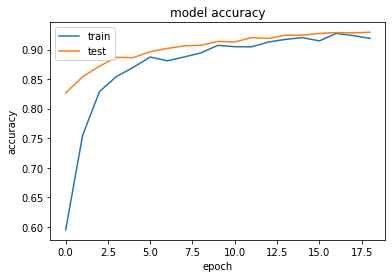

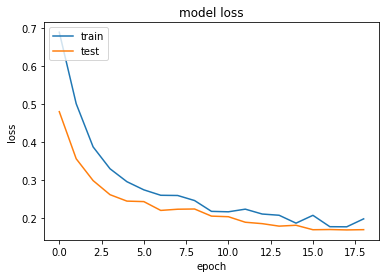

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
# list all data in training
print(training.history.keys())
# summarize training for accuracy
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize traning for loss
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#### <b> Predict the image


[[1.]]
Prediction:  Dog


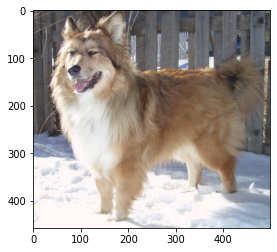

In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np
img_pred = image.load_img("/content/test_set/test_set/dogs/dog.4003.jpg",target_size=(150,150))

img_pred=image.img_to_array(img_pred)
img_pred=np.expand_dims(img_pred, axis=0)

result = model3.predict(img_pred)
print(result)
if result[0][0]==1:
    prediction ="Dog"
else:
    prediction ="Cat"
print('Prediction: ',prediction)

img=mpimg.imread('/content/test_set/test_set/dogs/dog.4006.jpg')
imgplot = plt.imshow(img)
plt.show()


[[0.]]
Prediction:  Cat


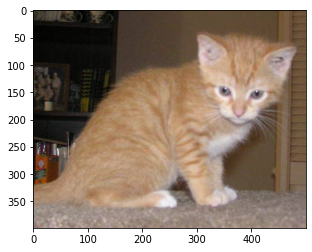

In [ ]:
img_pred = image.load_img("/content/test_set/test_set/cats/cat.4003.jpg",target_size=(150,150))

img_pred=image.img_to_array(img_pred)
img_pred=np.expand_dims(img_pred, axis=0)

rslt = model3.predict(img_pred)
print(rslt)
if rslt[0][0]==1:
    prediction ="Dog"
else:
    prediction ="Cat"
print('Prediction: ',prediction)

img=mpimg.imread('/content/test_set/test_set/cats/cat.4003.jpg')
imgplot = plt.imshow(img)
plt.show()
